# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`


**note: This model was trained on only 10 images due to limitations in the GPU.**

In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import shutil


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/Tuwaiq/week 4/3- Convolutional_Neural_Networks/LAB/traindata/traindata'
test_dir = '/content/drive/MyDrive/Tuwaiq/week 4/3- Convolutional_Neural_Networks/LAB/testdata/testdata'

img_size = (600, 600)
batch_size = 128

train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0)


test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# flow_from_directory function then automatically labels the images based on the subdirectory names
# It looks inside the train_dir for subdirectories. Each subdirectory is assumed to represent a different class.
# It assigns labels to the images based on the names of the subdirectories

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)


Found 3089 images belonging to 3 classes.
Found 1529 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [4]:
train_dir = '/content/drive/MyDrive/Tuwaiq/week 4/3- Convolutional_Neural_Networks/LAB/traindata/traindata'
new_train_dir = '/content/drive/MyDrive/Tuwaiq/week 4/3- Convolutional_Neural_Networks/LAB/traindata/traindata/Reduced_DATA'

class_names = ['men', 'women']

for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    new_class_dir = os.path.join(new_train_dir, class_name)

    # Create the class folder in the new directory
    if not os.path.exists(new_class_dir):
        os.makedirs(new_class_dir)

    # Check if the class directory exists before trying to list the files
    if os.path.exists(class_dir):
        # Get all image files in the class directory
        image_files = sorted(os.listdir(class_dir))
        selected_files = image_files[:10]

        # Copy the selected files to the new directory
        for file_name in selected_files:
            src = os.path.join(class_dir, file_name)
            dst = os.path.join(new_class_dir, file_name)
            shutil.copyfile(src, dst)

        print(f'Copied {len(selected_files)} images from class {class_name}')
    else:
        print(f'Class directory {class_dir} does not exist')

print("Done!")

Copied 10 images from class men
Copied 10 images from class women
Done!


In [6]:
new_test_dir = '/content/drive/MyDrive/Tuwaiq/week 4/3- Convolutional_Neural_Networks/LAB/testdata/testdata'

img_size = (600, 600)
batch_size = 1

train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0)


test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# flow_from_directory function then automatically labels the images based on the subdirectory names
# It looks inside the train_dir for subdirectories. Each subdirectory is assumed to represent a different class.
# It assigns labels to the images based on the names of the subdirectories

train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


test_generator = test_datagen.flow_from_directory(
    new_test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

Found 198 images belonging to 3 classes.
Found 1529 images belonging to 3 classes.


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Tuwaiq/week 4/3- Convolutional_Neural_Networks/LAB/traindata/traindata/women/00000000.jpg')

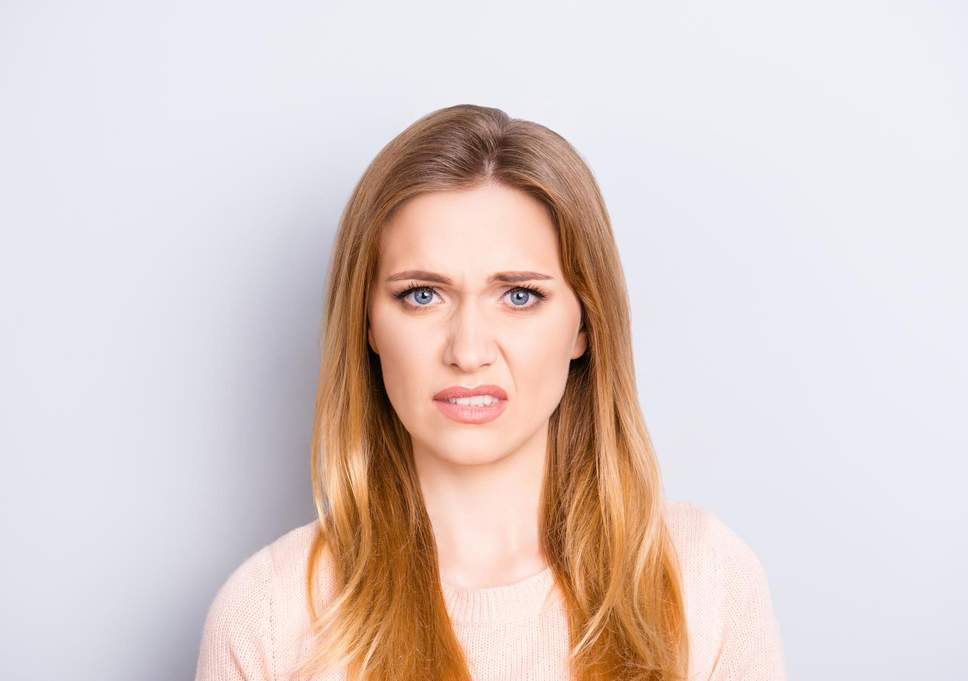

In [ ]:
# Display the image
from google.colab.patches import cv2_imshow
cv2_imshow(img)

## CNN Model


In [7]:
model = Sequential()

model.add(Conv2D(16,(3,3), input_shape=(600,600,3), activation='relu'))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(Conv2D(16,(3,3), activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,(3,3), activation='relu'))
model.add(Conv2D(16,(3,3), activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 598, 598, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 596, 596, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 594, 594, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 297, 297, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 295, 295, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 293, 293, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 146, 146, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 341056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      43,655,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,673,345 (166.60 MB)

 Trainable params: 43,673,345 (166.60 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [ ]:
history = model.fit(train_generator,epochs=10, validation_data=test_generator)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


198/198 ━━━━━━━━━━━━━━━━━━━━ 507s 3s/step - accuracy: 0.5188 - loss: -172138692608.0000 - val_accuracy: 0.4975 - val_loss: 26955017617408.0000
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 566s 3s/step - accuracy: 0.5294 - loss: -1452154346799104.0000 - val_accuracy: 0.4975 - val_loss: 46791143249149952.0000
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 525s 3s/step - accuracy: 0.4878 - loss: -212874642367447040.0000 - val_accuracy: 0.4975 - val_loss: 2301085147522400256.0000
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 566s 3s/step - accuracy: 0.4691 - loss: -5657794916198121472.0000 - val_accuracy: 0.4975 - val_loss: 29736445904829808640.0000
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 547s 3s/step - accuracy: 0.4407 - loss: -56604283564978077696.0000 - val_accuracy: 0.4975 - val_loss: 194659139470393081856.0000
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - accuracy: 0.4458 - loss: nan - val_accuracy: 0.5025 - val_loss: nan
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 483s 2s/step - accuracy: 0.0000e

##  Evaluate the Model


In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step - accuracy: 0.5475 - loss: 19657178218496.0000
Test accuracy: 0.50


In [ ]:
loss, accuracy = model.evaluate(train_generator)
print(f'Test accuracy: {accuracy:.2f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.4751 - loss: -22079944523776.0000
Test accuracy: 0.50
